In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Считывание данных

In [2]:
file_obj = open('6.csv', 'r')

# массив данных
date = np.array([])

# значение лямбда
lam_true = file_obj.readline().split(' ')
lam_true = 1/float(lam_true[-1])

# t0
t0 = file_obj.readline().split(' ')
t0 = float(t0[-1])

# t
t = file_obj.readline().split(' ')
t = float(t[-1])

# приведение данных к float
for line in file_obj:
    line = line[:-1]
    date = np.append(date, float(line))
file_obj.close()

# сортировка данных по возрастанию
date.sort()

In [3]:
print lam_true

0.00952380952381


## Вывод формулы $E(N_{t}|N_{s})$

$E(N_{t}|N_{s}) = E(N_{t} - N_{s}|N_{s}) + E(N_{s}|N_{s}) = $ по св-ву условного матожидания |$ = E(N_{t} - N_{s}|N_{s}) + E(N_{s}) = $ из независимости |$(N_{t} - N_{s})$ и $N_{s}$ и т.к. рассматривается ситуация в момент времени s | $ = E(N_{t} - N_{s}) + N_{s}$

$E(N_{t} - N_{s}) = \lambda*(t - s)$

Таким образом:

$E(N_{t}|N_{s}) = \lambda * (t - s) + N_{s}$

## Построение прогноза

In [4]:
def bayesian_estimation(sample, alpha, beta):
    sum_sample = sample[-1] - sample[0]
    conditional_expectation = (sample.size + alpha)/(sum_sample + beta)
    return conditional_expectation

In [5]:
def get_forecast_with_est(t, t0, date, alpha, beta):
    # прогноз количества серверов, которые сломаются в момент времени t
    # в i-ой ячейке хранится предсказание, данное в i*t0 момент времени
    break_servers = np.zeros(int(t/t0))

    lam = 0
    
    # количество серверов, сломавшихся к данному моменту
    cur_broke_servers = 0

    for time in np.arange(t0, t, t0):
        # обновляем количество сломавшихся серверов к моменту времени time
        while cur_broke_servers < date.size and date[cur_broke_servers] <= time:
            cur_broke_servers += 1

        # обновляем значение lam
        lam = bayesian_estimation(date[:cur_broke_servers], alpha, beta)

        # прогноз, полученный в момент времени time
        break_servers[int(time/t0)] = lam*(t - time) + cur_broke_servers
    
    return break_servers

In [6]:
def get_forecast_with_true_lambda(t, t0, date, lam):
    # прогноз количества серверов, которые сломаются в момент времени t
    # в i-ой ячейке хранится предсказание, данное в i*t0 момент времени
    break_servers = np.zeros(int(t/t0))

    # количество серверов, сломавшихся к данному моменту
    cur_broke_servers = 0

    for time in np.arange(0, t, t0):
        # обновляем количество сломавшихся серверов к моменту времени time
        while cur_broke_servers < date.size and date[cur_broke_servers] <= time:
            cur_broke_servers += 1

        # прогноз, полученный в момент времени time
        break_servers[int(time/t0)] = lam*(t - time) + cur_broke_servers
        
    return break_servers

$\alpha = 1$, потому что мы не знаем ничего о распределении $\lambda$, а при $\alpha > 1$ появляется горб в окрестности какого-то числа.
$\beta = 1$ - чтобы график плотности был достаточно плавный.

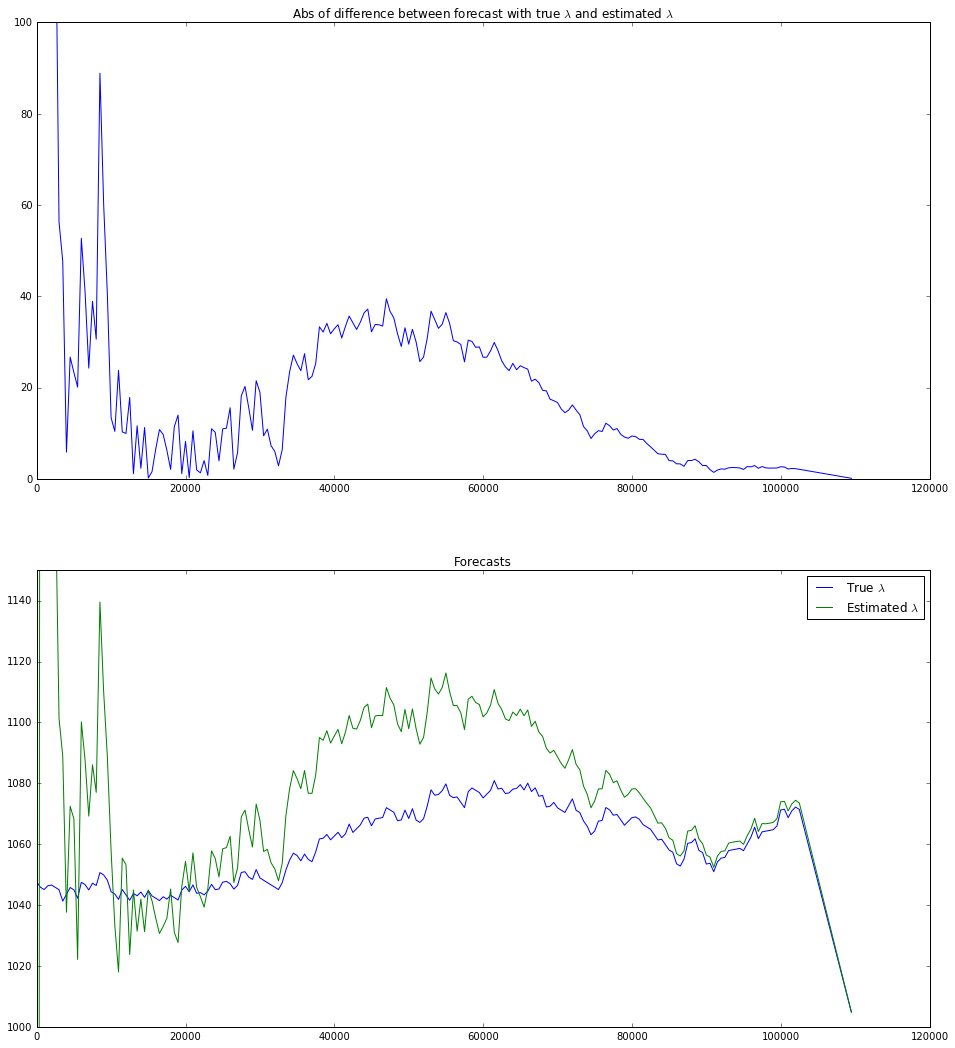

In [7]:
# строим график прогноза от времени

# время
time = np.arange(0, t, t0)

# параметры априорного распределения
alpha = 1
beta = 1

# прогнозы
true_forecast = get_forecast_with_true_lambda(t, t0, date, lam_true)
est_forecast = get_forecast_with_est(t, t0, date, alpha, beta)

# построение графиков
plt.figure(figsize=(16, 18))

plt.subplot(2, 1, 1)

plt.plot(time, np.abs(true_forecast - est_forecast))
plt.ylim(0, 100)
plt.title('Abs of difference between forecast with true $\\lambda$ and estimated $\\lambda$')

plt.subplot(2, 1, 2)

plt.plot(time, true_forecast, label = 'True $\\lambda$')
plt.plot(time, est_forecast, label = 'Estimated $\\lambda$')
plt.ylim(1000, 1150)
plt.legend()
plt.title('Forecasts')

plt.show()

In [8]:
# на всякий случай печать прогноза с данным лямбда
print true_forecast

[ 1047.61904762  1045.85714286  1045.0952381   1046.33333333  1046.57142857
  1045.80952381  1045.04761905  1041.28571429  1043.52380952  1045.76190476
  1045.          1042.23809524  1047.47619048  1046.71428571  1044.95238095
  1047.19047619  1046.42857143  1050.66666667  1049.9047619   1048.14285714
  1044.38095238  1043.61904762  1041.85714286  1045.0952381   1043.33333333
  1041.57142857  1043.80952381  1043.04761905  1044.28571429  1042.52380952
  1044.76190476  1043.          1042.23809524  1041.47619048  1042.71428571
  1041.95238095  1043.19047619  1042.42857143  1041.66666667  1044.9047619
  1046.14285714  1044.38095238  1046.61904762  1043.85714286  1044.0952381
  1043.33333333  1044.57142857  1046.80952381  1045.04761905  1045.28571429
  1047.52380952  1047.76190476  1047.          1045.23809524  1046.47619048
  1050.71428571  1050.95238095  1049.19047619  1048.42857143  1051.66666667
  1048.9047619   1048.14285714  1047.38095238  1046.61904762  1045.85714286
  1045.0952381

In [9]:
# на всякий случай печать прогноза с оцениваемым лямбда
print est_forecast

[    0.          1479.10628774  1211.2096518   1210.26440453  1170.31757064
  1178.84865163  1101.36295454  1088.98037259  1037.64854652  1072.4509195
  1068.30417418  1022.12261205  1100.18361654  1087.70656246  1069.22802656
  1086.08604931  1077.02851314  1139.5331691   1110.0660757   1088.46302841
  1057.80007434  1033.19729409  1018.04617081  1055.40379353  1053.29429447
  1023.71008331  1044.95173182  1031.39922629  1041.94967117  1031.25766651
  1044.96254911  1041.40624396  1035.69756708  1030.65366156  1032.9926001
  1035.68724459  1045.27389222  1030.97312936  1027.68482266  1046.06698077
  1054.35995963  1044.65205492  1057.15290725  1045.8331163   1042.76059052
  1039.31199554  1045.34183017  1057.80270055  1055.25622063  1049.24521497
  1058.49952657  1058.86209064  1062.59648815  1047.39520433  1052.25862444
  1068.95295885  1071.21160848  1064.79110299  1059.07190833  1073.18524457
  1067.92021829  1057.60044889  1058.28722911  1053.90975756  1051.89004812
  1047.9794030

In [10]:
# на всякий случай печать исходных данных
print lam_true, '\n', t0, '\n', t, '\n', date

0.00952380952381 
500.0 
110000.0 
[    198.4406     460.8092     494.1672     517.8483     560.4        633.9109
     921.567     1158.8588    1274.4149    1287.2666    1328.9348
    1360.5433    1466.1662    1581.8253    1592.6818    1821.1689
    1821.574     1978.1997    2041.0241    2080.241     2267.9437
    2334.7124    2515.4969    2797.2978    2827.6293    2883.9754
    3005.4021    3518.4422    3640.7351    3677.105     3701.6948
    3836.6024    3874.7631    3893.9537    4061.5291    4198.8996
    4226.5964    4266.4072    4331.3636    4419.0845    4493.3309
    4632.8954    4841.545     4854.6571    4917.4448    5289.0997
    5341.4091    5505.4492    5515.7956    5574.0126    5711.1751
    5748.7882    5758.8604    5932.6071    5976.6869    5979.5218
    5979.74      6273.6398    6336.2478    6429.7853    6447.5224
    6589.2105    6626.7495    6857.621     7032.9753    7210.182
    7229.9956    7370.2266    7375.1584    7458.1236    7467.7602
    7549.1966    7649.2758   